# KNN or K-Nearest Neighbours

KNN is a lazy learning algorithm which is used for classification. In this algorithm, the unknown or test set data will consider 'K' nearest neighbours from training set and predict the class based on count of its 'K' nearest neighbours i.e Among it's K nearest neighbours, which ever class has the highest count, it will be assigned to that particular class. Steps involved in this algorithm are:

1. Choose the number K of neighbours
2. Take the K nearest neighbours of the new data point, according to Euclidian Distance
3. Among the data points, count the number of datapoints in each category.
4. Assign the new data point to the category where you counted the most neighbours.

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 26 16:06:25 2018

@author: purandur
"""
#imporing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [3]:
#feature scaling
class FeatureScaling:
    def __init__(self,X,y):
        self.X=X.copy()
        if y.ndim==1:
            y=np.reshape(y,(y.shape[0],1))
        self.y=y.copy()
        self.minMax_X={}
        self.minMax_y={}
    
    def fit_transform_X(self):
        num_of_features=self.X.shape[1]
        for i in range(num_of_features):
            feature=self.X[:,i]
            Mean=np.mean(feature)
            Min=np.min(feature)
            Max=np.max(feature)
            feature=(feature-Mean)/(Max-Min)
            self.minMax_X[i]=np.array([Mean,Min,Max])
            self.X[:,i]=feature
        return self.X.copy()
    
    def fit_transform_Y(self):
        num_of_features=self.y.shape[1]
        for i in range(num_of_features):
            feature=self.y[:,i]
            Mean=np.mean(feature)
            Min=np.min(feature)
            Max=np.max(feature)
            feature=(feature-Mean)/(Max-Min)
            self.minMax_y[i]=np.array([Mean,Min,Max])
            self.y[:,i]=feature
        return np.reshape(self.y,self.y.shape[0])
    
    def inverse_transform_X(self,X):
        X_transformed=X.copy()
        num_of_features=X_transformed.shape[1]
        for i in range(num_of_features):
            feature=X_transformed[:,i]
            Mean=self.minMax_X[i][0]
            Min=self.minMax_X[i][1]
            Max=self.minMax_X[i][2]
            feature=feature*(Max-Min)+Mean
            X_transformed[:,i]=feature
        return X_transformed
    
    def inverse_transform_Y(self,y):
        y_transformed=y.copy()
        if y_transformed.ndim==1:
            y_transformed=np.reshape(y_transformed,(y_transformed.shape[0],1))
        num_of_features=y_transformed.shape[1]
        for i in range(num_of_features):
            feature=y_transformed[:,i]
            Mean=self.minMax_y[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=feature*(Max-Min)+Mean
            y_transformed[:,i]=feature
        return np.reshape(y_transformed,y_transformed.shape[0])
    
    def transform_X(self,X):
        X_transformed=X.copy()
        num_of_features=X_transformed.shape[1]
        for i in range(num_of_features):
            feature=X_transformed[:,i]
            Mean=self.minMax_X[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=(feature-Mean)/(Max-Min)
            X_transformed[:,i]=feature
        return X_transformed
    
    def transform_Y(self,y):
        y_transformed=y.copy()
        if y_transformed.ndim==1:
            y_transformed=np.reshape(y_transformed,(y_transformed.shape[0],1))
        num_of_features=y_transformed.shape[1]
        for i in range(num_of_features):
            feature=y_transformed[:,i]
            Mean=self.minMax_y[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=(feature-Mean)/(Max-Min)
            y_transformed[:,i]=feature
        return np.reshape(y_transformed,y_transformed.shape[0])
    
    def returnX(self):
        return self.X
    
    def returnY(self):
        return self.y

In [5]:
import numpy as np
class KNN:
    def __init__(self,X_train,Y_train,K):
        self.X_train=X_train
        self.Y_train=Y_train
        self.K=K
        
    def predict(self,X):
        y_pred=np.array([])
        for each in X:
            ed=np.sum((each-self.X_train)**2,axis=1)
            y_ed=np.concatenate((self.Y_train.reshape(self.Y_train.shape[0],1),ed.reshape(ed.shape[0],1)),axis=1)
            y_ed=y_ed[y_ed[:,1].argsort()]
            K_neighbours=y_ed[0:self.K]
            (values,counts) = np.unique(K_neighbours[:,0].astype(int),return_counts=True)
            y_pred=np.append(y_pred,values[np.argmax(counts)])
        return y_pred
            

In [6]:
#reading dataset
Data=pd.read_csv('Social_Network_Ads.csv')
print(Data.head(10))
Data.describe()

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
#training and testing set size
train_size=int(0.75*Data.shape[0])
test_size=int(0.25*Data.shape[0])
print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

Training set size : 300
Testing set size : 100


In [8]:
#Getting features from dataset
Data=Data.sample(frac=1)
X=Data.iloc[:,[2, 3]].values
y=Data.iloc[:,4].values
X=X.astype(float)

In [9]:
#feature scaling
fs=FeatureScaling(X,y)
X=fs.fit_transform_X()

In [10]:
#training set split
X_train=X[0:train_size,:]
Y_train=y[0:train_size]

In [11]:
#testing set split
X_test=X[train_size:,:]
Y_test=y[train_size:]

In [12]:
l=time.time()
knn=KNN(X_train,Y_train,5)
y_pred=knn.predict(X_test)
r=time.time()
KNN_learn_time=(r-l)
print(r-l)

0.017045021057128906


In [13]:
#getting the confusion matrix
tp=len([i for i in range(0,Y_test.shape[0]) if Y_test[i]==0 and y_pred[i]==0])
tn=len([i for i in range(0,Y_test.shape[0]) if Y_test[i]==0 and y_pred[i]==1])
fp=len([i for i in range(0,Y_test.shape[0]) if Y_test[i]==1 and y_pred[i]==0])
fn=len([i for i in range(0,Y_test.shape[0]) if Y_test[i]==1 and y_pred[i]==1])
confusion_matrix=np.array([[tp,tn],[fp,fn]])
print(confusion_matrix)

[[54  8]
 [ 6 32]]


In [14]:
#Same algorithm using sklearn KNN just for comparsion purpose
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
l=time.time()
classifier.fit(X_train, Y_train)
y_pred_sklearn = classifier.predict(X_test)
r=time.time()
sklearn_time=(r-l)
print(sklearn_time)

0.0020058155059814453


In [15]:
print("But sklearn time is faster than our implementation by: "+str(KNN_learn_time/sklearn_time)+" times")

But sklearn time is faster than our implementation by: 8.497801022227504 times


In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred_sklearn)
print(cm)

[[54  8]
 [ 6 32]]


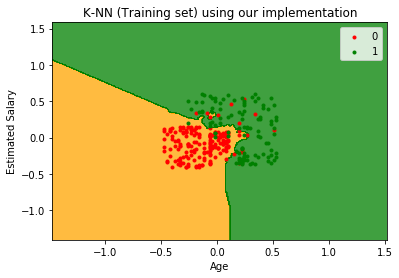

Time required for plotting is: 25.802637815475464 seconds


In [17]:
# Visualising the Training set results for our implementation
l=time.time()
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('K-NN (Training set) using our implementation')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
r=time.time()
print("Time required for plotting is: "+str(r-l)+" seconds")

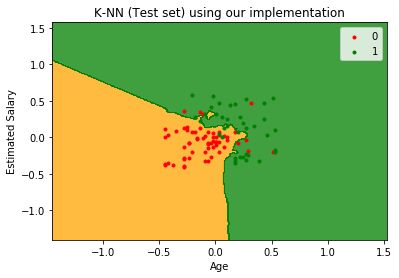

Time required for plotting is: 22.427660942077637 seconds


In [18]:
# Visualising the Test set results for our implementation
l=time.time()
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('K-NN (Test set) using our implementation')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
r=time.time()
print("Time required for plotting is: "+str(r-l)+" seconds")

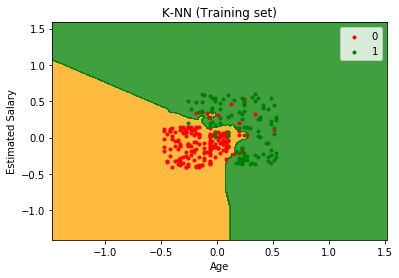

Time required for plotting is: 0.48911190032958984 seconds


In [19]:
# Visualising the Training set results for sklearn class
l=time.time()
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
r=time.time()
print("Time required for plotting is: "+str(r-l)+" seconds")

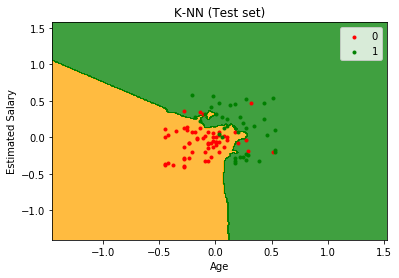

Time required for plotting is: 0.47005295753479004 seconds


In [20]:
# Visualising the Test set results for sklearn class
l=time.time()
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
r=time.time()
print("Time required for plotting is: "+str(r-l)+" seconds")

Conclusion is our implementation is slower but still we have achieved similar results compared to sklearn package